# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   

Good Luck!

### Daniel O'Brien

**Honor Pledge:**  
I pledge on my honor that I, **Daniel O'Brien**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
sklearn.__version__

'0.23.1'

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix


## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [5]:
df = pd.read_csv('gas_emissions.csv')

In [6]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [7]:
df.shape

(7384, 11)

### There are 7,384 rows and 11 columns. Because each column represents a variable, there are 11 variables. 

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [8]:
df2 = df[df.CO > 3]
df2.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
7,1.78240,1022.6,73.535,2.8327,23.337,1075.7,550.01,133.18,11.745,3.7350,85.749


In [9]:
df2['AP'].mean()

1015.6900173490633

### The mean AP value for CO levels above 3 *mg/$m^3$* is 1015.69

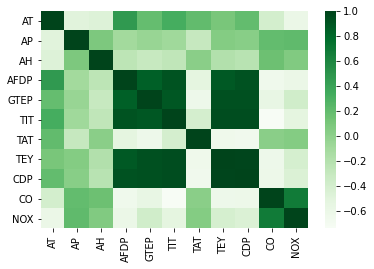

In [10]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens')

## Correlation Heatmap
### There are a few variables are are highly correlated. It appears that AFDP, GTEP, TIT, TEY and CPD are all highly correlated with each other. 

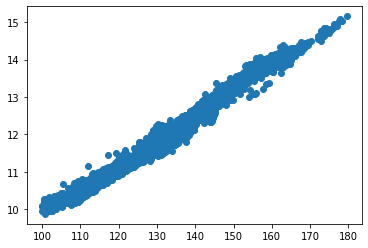

In [11]:
plt.scatter(df['TEY'], df['CDP'])


#### Create histograms for CO and NOX.

### CO Histogram

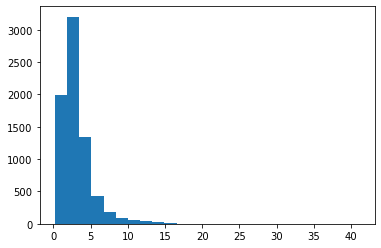

In [12]:
plot = plt.hist(df['CO'], bins=25)


### NOX Histogram

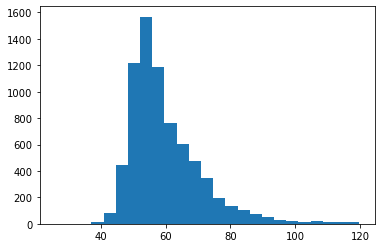

In [13]:
plot = plt.hist(df['NOX'], bins=25)


### Prepare data from machine learning

We will predict CO using all the other variables. The NOX will not be used. That is another emission gas that can be predicted as well.

In [14]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=555)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=555)

In [16]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [17]:
X_train.shape

(4651, 9)

In [18]:
X_val.shape

(1994, 9)

In [19]:
X_test.shape

(739, 9)

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ (on training data)?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $->$ square root $->$ RMSE)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn import metrics

In [22]:
reg = LinearRegression().fit(X_train, y_train)

In [23]:
TrainPred = reg.predict(X_train)

In [24]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.6468752136774542

In [25]:
TestPred = reg.predict(X_val)

In [26]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.6290818432737131

## $R^2$ for the training set is 0.65 and for the validation set is 0.63

In [27]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.3132338270806214

### The Root Mean Square Error for the training data is 1.31

In [28]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.3917448633939091

### The Root Mean Square Error for the validation data is 1.39

## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
regr = RandomForestRegressor(n_estimators = 100)

In [31]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
TrainPred = regr.predict(X_train)

In [33]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.9617080517734191

### The $R^2$ score for the training data is 0.96

In [34]:
TestPred = regr.predict(X_val)

In [35]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.747111035781487

### The $R^2$ for the validation data is 0.74

In [36]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

0.43244580781877695

### The RMSE for the training data is 0.43

In [37]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.1491732801048378

### The RMSE for the validation data is 1.15

### The training and validation data scores for $R^2$ and RMSE are not very close. This could be an indication of overfitting, where out model fits too closely to the training data, and then cannot accurately score the validation data. 

In [38]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [39]:
parameters = {
    'n_estimators': [25, 50, 75, 100],
    'min_samples_split': [2, 3, 5, 7, 10],
    'ccp_alpha': [0, 0.01, 0.05, 0.1, 0.5, 1]
}

In [40]:
cv = GridSearchCV(regr, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'ccp_alpha': 0, 'min_samples_split': 7, 'n_estimators': 50}

0.727 (+/-0.176) for {'ccp_alpha': 0, 'min_samples_split': 2, 'n_estimators': 25}
0.728 (+/-0.164) for {'ccp_alpha': 0, 'min_samples_split': 2, 'n_estimators': 50}
0.734 (+/-0.178) for {'ccp_alpha': 0, 'min_samples_split': 2, 'n_estimators': 75}
0.735 (+/-0.181) for {'ccp_alpha': 0, 'min_samples_split': 2, 'n_estimators': 100}
0.721 (+/-0.165) for {'ccp_alpha': 0, 'min_samples_split': 3, 'n_estimators': 25}
0.736 (+/-0.178) for {'ccp_alpha': 0, 'min_samples_split': 3, 'n_estimators': 50}
0.73 (+/-0.172) for {'ccp_alpha': 0, 'min_samples_split': 3, 'n_estimators': 75}
0.733 (+/-0.177) for {'ccp_alpha': 0, 'min_samples_split': 3, 'n_estimators': 100}
0.72 (+/-0.19) for {'ccp_alpha': 0, 'min_samples_split': 5, 'n_estimators': 25}
0.735 (+/-0.189) for {'ccp_alpha': 0, 'min_samples_split': 5, 'n_estimators': 50}
0.731 (+/-0.179) for {'ccp_alpha': 0, 'min_samples_split': 5, 'n_estimators': 75}
0.734 (+/-0.185) for {'c

In [41]:
regr = RandomForestRegressor(n_estimators = 50, min_samples_split = 7, ccp_alpha = 0)

In [42]:
regr.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0, min_samples_split=7, n_estimators=50)

In [43]:
TrainPred = regr.predict(X_train)

In [44]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.9266037971894621

In [45]:
TestPred = regr.predict(X_val)

In [46]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.7496786174744476

In [47]:
regr = RandomForestRegressor(n_estimators = 75, min_samples_split = 2, ccp_alpha = 0.1)

In [48]:
regr.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.1, n_estimators=75)

In [49]:
TrainPred = regr.predict(X_train)

In [50]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7522947469201016

In [51]:
TestPred = regr.predict(X_val)

In [52]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.6823895995033364

### I changed the minimum sample split and ccp alpha value and I found a result with a difference of less than 0.1. I changed the minimum sample split to 2, and set a ccp alpha value of 0.1, when I changed these three parameters, I got a training score of 0.75 and a validation score of 0.68.

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Apply the process above using **linear kernel SVR**, **polynomial kernel SVR**, and **RBF kernel SVR**.

- Take RBF Kernel SVM and perform some hyperparameter tuning. See if you can increase the $R^2$ score.
    - During this process this make sure it doesn't overfit the data. 
    - Look into the `C` and `gamma` values.

In [53]:
SVR_Model = SVR()

In [54]:
SVR_Model.fit(X_train, y_train)

SVR()

In [55]:
TrainPred = SVR_Model.predict(X_train)

In [56]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7537814347693682

In [57]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.0965750440937958

### The training $R^2$ score is 0.75 and the RMSE score is 1.1

In [58]:
TestPred = SVR_Model.predict(X_val)

In [59]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.7239434577070454

In [60]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.2006587843948826

### The validation $R^2$ score is 0.72 and the RMSE score is 1.2

### Linear SVM Regressor

In [61]:
svr_lin = SVR(kernel='linear', C=1e3)

In [62]:
svr_lin.fit(X_train, y_train)

SVR(C=1000.0, kernel='linear')

In [63]:
TrainPred = svr_lin.predict(X_train)

In [64]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.6149426892609726

In [65]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.3713257989253163

### The training $R^2$ value is 0.61 and the RMSE score is 1.37

In [66]:
TestPred = svr_lin.predict(X_val)

In [67]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.5930338258255874

In [68]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.4578060135156587

### The validation $R^2$ value is 0.59 and the RMSE value is 1.46

### Polynomial Kernel SVM Regressor

In [69]:
svr_poly = SVR(kernel='poly', C=1e3, degree=3)

In [70]:
svr_poly.fit(X_train, y_train).predict(X)

array([54538131.20261115, 58099567.26492375, 75472028.41162759, ...,
       26192005.37934858, 66660764.20259434, 55564528.95199674])

In [71]:
TrainPred = svr_poly.predict(X_train)

In [72]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7294267445571342

In [73]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.1495302210444531

### The $R^2$ value for the training set is 0.73 and the RMSE value is 1.15

In [74]:
TestPred = svr_poly.predict(X_val)

In [75]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.6736062790139807

In [76]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.305543895305146

### The $R^2$ value for the validation set is 0.67 and the RMSE for the validation set is 1.31

## RBF kernel SVR

In [77]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [78]:
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [79]:
TrainPred = svr_rbf.predict(X_train)

In [80]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7950424425485095

In [81]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.000483494477407

### The training $R^2$ value is 0.80 and the RMSE score is 1

In [82]:
TestPred = svr_rbf.predict(X_val)

In [83]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.6970894436046302

In [84]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.2577020969409263

### The validation $R^2$ value is 0.70 and the RMSE score is 1.26

In [85]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [86]:
parameters = {
    'gamma': [0.1, 0.5, 1, 5, 10],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, .5, 1, 5, 10]
}

In [87]:
cv = GridSearchCV(svr_rbf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'C': 10, 'gamma': 0.1}

0.125 (+/-0.043) for {'C': 0.001, 'gamma': 0.1}
-0.011 (+/-0.031) for {'C': 0.001, 'gamma': 0.5}
-0.048 (+/-0.031) for {'C': 0.001, 'gamma': 1}
-0.076 (+/-0.031) for {'C': 0.001, 'gamma': 5}
-0.078 (+/-0.031) for {'C': 0.001, 'gamma': 10}
0.387 (+/-0.086) for {'C': 0.005, 'gamma': 0.1}
0.172 (+/-0.054) for {'C': 0.005, 'gamma': 0.5}
0.054 (+/-0.035) for {'C': 0.005, 'gamma': 1}
-0.064 (+/-0.03) for {'C': 0.005, 'gamma': 5}
-0.074 (+/-0.03) for {'C': 0.005, 'gamma': 10}
0.473 (+/-0.104) for {'C': 0.01, 'gamma': 0.1}
0.273 (+/-0.071) for {'C': 0.01, 'gamma': 0.5}
0.141 (+/-0.048) for {'C': 0.01, 'gamma': 1}
-0.048 (+/-0.028) for {'C': 0.01, 'gamma': 5}
-0.069 (+/-0.03) for {'C': 0.01, 'gamma': 10}
0.641 (+/-0.139) for {'C': 0.05, 'gamma': 0.1}
0.478 (+/-0.113) for {'C': 0.05, 'gamma': 0.5}
0.352 (+/-0.09) for {'C': 0.05, 'gamma': 1}
0.047 (+/-0.031) for {'C': 0.05, 'gamma': 5}
-0.027 (+/-0.026) for {'C': 0.05, 'gamma': 10}
0.697 (+/-0.153) for {'C': 

In [88]:
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1)

In [89]:
svr_rbf.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [90]:
TrainPred = svr_rbf.predict(X_train)

In [91]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7667524817588922

In [92]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.067299916893449

In [93]:
TestPred = svr_rbf.predict(X_val)

In [94]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.738793267251711

In [95]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.1679191086768477

### By performing a gridsearch, I found the ideal parameters to be C=10 and gamma = 0.1. After adjusting these parameters, fitting the model and making predictions again, we saw a slight dip in the training $R^2$ score from 0.80 to 0.77, but we saw an increase in the $R^2$ score of the validation model from 0.70 to 0.74.

## Q5 [10]

- Apply PCA and transform the data. 
- Take sufficient number of components based on variance explained and/or validation accuracy using one of the models from before. (Linear reg, RF reg, or SVR)
- Use the PCA transformed data to perform regression.
- Apply Linear Regression, Random Forest Regression, and RBF Kernel Support Vector Regression.
For each model:
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare PCA SVR with SVR from before. Use the best hyperparameters obtained from the experiments before to fit the SVR onto the PCA transformed data. Any change in performance? Please explain. 
- Perform hyperparameter tuning of SVR using PCA transformed data. Any improvement?


In [96]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [98]:
pca.explained_variance_ratio_

array([5.81314778e-01, 2.07936879e-01, 9.93025006e-02, 5.49454071e-02,
       4.35326353e-02, 9.09814154e-03, 3.62801262e-03, 1.66600851e-04,
       7.50450512e-05])

### I will choose to use 4 components because they have a combined variance of over 90%

In [99]:
pca_train = PCA(n_components = 4)

In [100]:
pca_train.fit(X_train)
X_train_pca = pca_train.transform(X_train)
X_val_pca = pca_train.transform(X_val)
X_test_pca = pca_train.transform(X_test)

In [101]:
reg = LinearRegression().fit(X_train_pca, y_train)

In [102]:
TrainPred = reg.predict(X_train_pca)

In [103]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.6128523714371701

In [104]:
TestPred = reg.predict(X_val_pca)

In [105]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.5925986135843698

In [106]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.3750429430125595

In [107]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.4585852987864274

### For linear regression, once the PCA was applied the training $R^2$ score was 0.61 and the RMSE score is 1.38 and the validation $R^2$ score 0.59 and a validation RMSE score of 1.46

In [108]:
regr = RandomForestRegressor(n_estimators = 75, min_samples_split = 2, ccp_alpha = 0.1).fit(X_train_pca, y_train)

In [109]:
TrainPred = regr.predict(X_train_pca)

In [110]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7231293179181915

In [111]:
TestPred = regr.predict(X_val_pca)

In [112]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.6206852019409694

In [113]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.162830582312317

In [114]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.4074094853091657

### For the random forest regression, the training set had a $R^2$ score of 0.72 and an RMSE score of 1.16 and the validation set had a $R^2$ score of 0.62 and a RMSE score of 1.41

In [115]:
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1).fit(X_train_pca, y_train)

In [116]:
TrainPred = svr_rbf.predict(X_train_pca)

In [117]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7456823389845232

In [118]:
TestPred = svr_rbf.predict(X_val_pca)

In [119]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.705196268757198

In [120]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.1144644514946784

In [121]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.240757955908685

### The training set for svr_rbf returned a $R^2$ value of 0.75 and a RMSE of 1.11 and the validation set returned a $R^2$ value of 0.71 and a RMSE value of 1.24

### For the linear regression model, the $R^2$ values decreased for both the training (from 0.65 to 0.61) and valdiation sets (from 0.63 to 0.59). The RMSE values also increased for both sets (training from 1.31 to 1.38 and validation from 1.39 to 1.46).
### For the random forest, the training $R^2$ also decreased, from 0.75 to 0.72 and the validation $R^2$ also decreased from 0.69 to 0.62
### The Support Vector Regression also saw a decrease in $R^2$ scores, the training scores decreased from 0.77 to 0.75 and the validation scores decreased from 0.74 to 0.70

## Q6 [10]

- Apply Kernel PCA (KPCA) and transform the data. 
- After the kernel transformation of your data/vectors live in different feature space.
    - That's why in KPCA you will (in many cases) have more dimensions than your original number of features! 
    - The full returned matrix will be NxN size. 
    - Here we will select 100 componenets to cut on training time, otherwise it might take too long.
- You can either stick with 100 kernel principal components or take lesser number of components. You can make use of the `lambdas_` attribute which are the eigenvalues in the higher dimensional space - and act similar to PCA variance explained.
- Use the KPCA transformed data to perform regression.
- Now apply Linear Regression, Random Forest Regression, and RBF Kernel Support Vector Regression.
For each model:
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare KPCA SVR with SVR and PCA SVR from before. Use the best hyperparameters obtained from the experiments before. 
    - Is there any change in performance when compared to models trained on original data? Please explain. 
    - Is there any change in performance when compared to models trained on PCA transformed data? Please explain. 
    
- Perform hyperparameter tuning of SVR using KPCA transformed data. Any improvement?

======== 
- What is your conclusion considering all the regression models? Which one would you choose as your final contender?

In [122]:
from sklearn.decomposition import KernelPCA


In [123]:
kpca = KernelPCA(n_components=100, kernel='rbf', n_jobs=-1, remove_zero_eig=True, random_state='RandomState')
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_val_kpca = kpca.transform(X_val)

In [124]:
X_train_kpca.shape

(4651, 100)

In [125]:
X_val_kpca.shape

(1994, 100)

In [126]:
reg = LinearRegression()

In [127]:
reg.fit(X_train_kpca, y_train)

LinearRegression()

In [128]:
TrainPred = reg.predict(X_train_kpca)

In [129]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7580770439351178

In [130]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.086967352556054

In [131]:
TestPred = reg.predict(X_val_kpca)

In [132]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.7255978146578295

In [133]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.1970557126273629

## Linear Regression
### For the training set the $R^2$ value is 0.76 and the RMSE value is 1.09. For the validation set, the $R^2$ value is 0.73 and the RMSE value is 1.20

In [134]:
regr = RandomForestRegressor(n_estimators = 75, min_samples_split = 2, ccp_alpha = 0.1).fit(X_train_kpca, y_train)

In [135]:
TrainPred = regr.predict(X_train_kpca)

In [136]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7590823180269908

In [137]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.0847066377442958

In [138]:
TestPred = regr.predict(X_val_kpca)

In [139]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.6471638110315807

In [140]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.357397802999127

## Random Forest
### For the training set the $R^2$ value is 0.76 and the RMSE value is 1.08. For the validation set the $R^2$ value is 0.65 and the RMSE value is 1.36

In [141]:
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1).fit(X_train_kpca, y_train)

In [142]:
TrainPred = svr_rbf.predict(X_train_kpca)

In [143]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7529633384307788

In [144]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.0983952969128699

In [145]:
TestPred = svr_rbf.predict(X_val_kpca)

In [146]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.7304797312459077

In [147]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.186359455923635

## RBF Kernal Support Vector Regression
### For the training set the $R^2$ value is 0.75 and the RMSE score is 1.10. For the validation set, the $R^2$ value is 0.73 and the RMSE value is 1.19

### The linear regression saw improvement across the board, in the training set, the $R^2$ value increase to 0.76 and the RMSE value fell to it's lowest at 1.09. For the validation set, we saw the highest $R^2$ value of 0.73 and the lowest RMSE value of 1.2.
### For Random Forest, the $R^2$ score for training set was 0.76, which is the highest for random forest so far. The $R^2$ score for the validation set came in at 0.65, which was between the first two $R^2$ values, higher than the PCA regression, but lower than the original regression.
### For the Support Vector Regression, the $R^2$ value for the training set was 0.75 which is the same as the inital $R^2$ score, and the validation set had an $R^2$ value of 0.73, which is between the other two $R^2$ values, higher than the PCA score but lower than the orignal score.

In [148]:
parameters = {
    'gamma': [0.1, 0.5, 1, 5, 10],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, .5, 1, 5, 10]
}

In [149]:
cv = GridSearchCV(svr_rbf, parameters, cv=5)
cv.fit(X_train_kpca, y_train)

print_results(cv)

BEST PARAMS: {'C': 10, 'gamma': 0.5}

-0.038 (+/-0.03) for {'C': 0.001, 'gamma': 0.1}
0.036 (+/-0.033) for {'C': 0.001, 'gamma': 0.5}
0.046 (+/-0.035) for {'C': 0.001, 'gamma': 1}
-0.046 (+/-0.031) for {'C': 0.001, 'gamma': 5}
-0.066 (+/-0.031) for {'C': 0.001, 'gamma': 10}
0.099 (+/-0.041) for {'C': 0.005, 'gamma': 0.1}
0.28 (+/-0.069) for {'C': 0.005, 'gamma': 0.5}
0.293 (+/-0.071) for {'C': 0.005, 'gamma': 1}
0.064 (+/-0.036) for {'C': 0.005, 'gamma': 5}
-0.021 (+/-0.028) for {'C': 0.005, 'gamma': 10}
0.211 (+/-0.057) for {'C': 0.01, 'gamma': 0.1}
0.384 (+/-0.088) for {'C': 0.01, 'gamma': 0.5}
0.395 (+/-0.091) for {'C': 0.01, 'gamma': 1}
0.156 (+/-0.05) for {'C': 0.01, 'gamma': 5}
0.029 (+/-0.032) for {'C': 0.01, 'gamma': 10}
0.451 (+/-0.099) for {'C': 0.05, 'gamma': 0.1}
0.575 (+/-0.124) for {'C': 0.05, 'gamma': 0.5}
0.587 (+/-0.128) for {'C': 0.05, 'gamma': 1}
0.378 (+/-0.095) for {'C': 0.05, 'gamma': 5}
0.22 (+/-0.063) for {'C': 0.05, 'gamma': 10}
0.529 (+/-0.115) for {'C': 0.1, 

In [150]:
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5)

In [151]:
svr_rbf.fit(X_train_kpca, y_train)

SVR(C=10, gamma=0.5)

In [152]:
TrainPred = svr_rbf.predict(X_train_kpca)

In [153]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7684172900202348

In [154]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.063484159983866

In [155]:
TestPred = svr_rbf.predict(X_val_kpca)

In [156]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.7370339476138834

In [157]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.1718456819881358

### After identify the optimal parameters and applying them to the Support Vector Regression, There was a slight improvement in the $R^2$ scores for both training (from 0.75 to 0.77) and validation (from 0.73 to 0.74)

### Overall, the best regression model would be to the Support Vector Regression we just tuned with a training $R^2$ score of 0.77 and an RMSE value of 1.06 and a validation $R^2$ score of 0.74 and an RMSE value of 1.17

## Q7 [10]

#### Let's do some classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [158]:
from sklearn.preprocessing import Binarizer

In [159]:
binarizer = Binarizer(threshold=3)

In [160]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

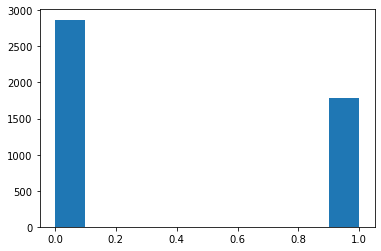

In [161]:
plt.hist(y_train_cat);

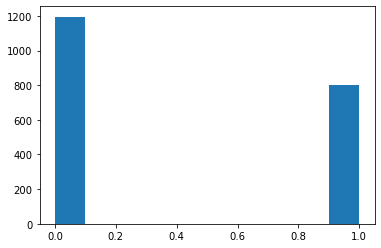

In [162]:
plt.hist(y_val_cat);

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

    

#### 3. Kernel PCA transformed training data
- Using the **kernel pca** transformed training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

- Compare the results of Kernel RBF SVM model 1, 2, and 3. Which one is the best?
    


In [163]:
from sklearn.svm import SVC

In [164]:
estimator = SVC(kernel ='rbf')

### SVC Model 1 

In [165]:
parameters = {
    'gamma': [0.1, 0.5, 1, 5, 10],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, .5, 1, 5, 10]
}

In [166]:
cv = GridSearchCV(estimator, parameters, cv=5)
cv.fit(X_train, y_train_cat)

print_results(cv)

BEST PARAMS: {'C': 10, 'gamma': 0.5}

0.617 (+/-0.001) for {'C': 0.001, 'gamma': 0.1}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 0.5}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 1}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 10}
0.892 (+/-0.024) for {'C': 0.005, 'gamma': 0.1}
0.72 (+/-0.009) for {'C': 0.005, 'gamma': 0.5}
0.617 (+/-0.001) for {'C': 0.005, 'gamma': 1}
0.617 (+/-0.001) for {'C': 0.005, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.005, 'gamma': 10}
0.895 (+/-0.018) for {'C': 0.01, 'gamma': 0.1}
0.871 (+/-0.01) for {'C': 0.01, 'gamma': 0.5}
0.678 (+/-0.002) for {'C': 0.01, 'gamma': 1}
0.617 (+/-0.001) for {'C': 0.01, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.01, 'gamma': 10}
0.908 (+/-0.017) for {'C': 0.05, 'gamma': 0.1}
0.913 (+/-0.019) for {'C': 0.05, 'gamma': 0.5}
0.911 (+/-0.02) for {'C': 0.05, 'gamma': 1}
0.618 (+/-0.003) for {'C': 0.05, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.05, 'gamma': 10}
0.913 (+/-0.015) for {'C': 0.1, 'ga

In [167]:
estimator = SVC(kernel='rbf', C=10, gamma = 0.5)

In [168]:
estimator.fit(X_train, y_train_cat)

SVC(C=10, gamma=0.5)

In [169]:
TrainPred = estimator.predict(X_train)

In [170]:
accuracyTrain = metrics.accuracy_score(y_true = y_train_cat, y_pred = TrainPred)
accuracyTrain

0.9453880885831004

In [171]:
TestPred = estimator.predict(X_val)

In [172]:
accuracyTest = metrics.accuracy_score(y_true = y_val_cat, y_pred = TestPred)
accuracyTest

0.9242728184553661

In [173]:
confusion_matrix(y_val_cat, TestPred)

array([[1118,   77],
       [  74,  725]])

In [174]:
sklearn.metrics.recall_score(y_true = y_val_cat, y_pred = TestPred)

0.9073842302878599

In [175]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val_cat, y_pred = TestPred).ravel()
specificity = tn / (tn+fp)
specificity

0.9355648535564853

In [176]:
metrics.precision_score(y_true = y_val_cat, y_pred = TestPred)

0.9039900249376559

In [177]:
metrics.balanced_accuracy_score(y_true = y_val_cat, y_pred = TestPred, sample_weight=None, adjusted=False)

0.9214745419221726

In [178]:
sklearn.metrics.f1_score(y_true = y_val_cat, y_pred = TestPred)

0.905683947532792

### The recall score is 0.91
### The specificity score is 0.94
### The precision score is 0.90
### The balanced accuracy score is 0.92
### The F1 score is 0.91

### SVC Model 2

In [179]:
estimator = SVC(kernel ='rbf')

In [180]:
parameters = {
    'gamma': [0.1, 0.5, 1, 5, 10],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, .5, 1, 5, 10]
}

In [181]:
cv = GridSearchCV(estimator, parameters, cv=5)
cv.fit(X_train_pca, y_train_cat)

print_results(cv)

BEST PARAMS: {'C': 10, 'gamma': 0.1}

0.617 (+/-0.001) for {'C': 0.001, 'gamma': 0.1}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 0.5}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 1}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 10}
0.885 (+/-0.029) for {'C': 0.005, 'gamma': 0.1}
0.791 (+/-0.01) for {'C': 0.005, 'gamma': 0.5}
0.622 (+/-0.005) for {'C': 0.005, 'gamma': 1}
0.617 (+/-0.001) for {'C': 0.005, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.005, 'gamma': 10}
0.888 (+/-0.021) for {'C': 0.01, 'gamma': 0.1}
0.875 (+/-0.019) for {'C': 0.01, 'gamma': 0.5}
0.788 (+/-0.004) for {'C': 0.01, 'gamma': 1}
0.617 (+/-0.001) for {'C': 0.01, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.01, 'gamma': 10}
0.899 (+/-0.015) for {'C': 0.05, 'gamma': 0.1}
0.906 (+/-0.02) for {'C': 0.05, 'gamma': 0.5}
0.905 (+/-0.021) for {'C': 0.05, 'gamma': 1}
0.681 (+/-0.013) for {'C': 0.05, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.05, 'gamma': 10}
0.906 (+/-0.015) for {'C': 0.1, 'g

In [182]:
estimator = SVC(kernel='rbf', C=10, gamma = 0.1)

In [183]:
estimator.fit(X_train_pca, y_train_cat)

SVC(C=10, gamma=0.1)

In [184]:
TrainPred = estimator.predict(X_train_pca)

In [185]:
accuracyTrain = metrics.accuracy_score(y_true = y_train_cat, y_pred = TrainPred)
accuracyTrain

0.9180821328746506

In [186]:
TestPred = estimator.predict(X_val_pca)

In [187]:
accuracyTest = metrics.accuracy_score(y_true = y_val_cat, y_pred = TestPred)
accuracyTest

0.9147442326980942

In [188]:
confusion_matrix(y_val_cat, TestPred)

array([[1123,   72],
       [  98,  701]])

In [189]:
sklearn.metrics.recall_score(y_true = y_val_cat, y_pred = TestPred)

0.8773466833541927

In [190]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val_cat, y_pred = TestPred).ravel()
specificity = tn / (tn+fp)
specificity

0.9397489539748954

In [191]:
metrics.precision_score(y_true = y_val_cat, y_pred = TestPred)

0.906856403622251

In [192]:
metrics.balanced_accuracy_score(y_true = y_val_cat, y_pred = TestPred, sample_weight=None, adjusted=False)

0.9085478186645441

In [193]:
sklearn.metrics.f1_score(y_true = y_val_cat, y_pred = TestPred)

0.8918575063613232

### The recall score is 0.88
### The specificity score is 0.94
### The precision score is 0.91
### The balanced accuracy score is 0.91
### The F1 score is 0.89

### SVC Model 3

In [194]:
estimator = SVC(kernel ='rbf')

In [195]:
parameters = {
    'gamma': [0.1, 0.5, 1, 5, 10],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, .5, 1, 5, 10]
}

In [196]:
cv = GridSearchCV(estimator, parameters, cv=5)
cv.fit(X_train_kpca, y_train_cat)

print_results(cv)

BEST PARAMS: {'C': 5, 'gamma': 0.1}

0.617 (+/-0.001) for {'C': 0.001, 'gamma': 0.1}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 0.5}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 1}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.001, 'gamma': 10}
0.617 (+/-0.001) for {'C': 0.005, 'gamma': 0.1}
0.867 (+/-0.024) for {'C': 0.005, 'gamma': 0.5}
0.874 (+/-0.022) for {'C': 0.005, 'gamma': 1}
0.617 (+/-0.001) for {'C': 0.005, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.005, 'gamma': 10}
0.757 (+/-0.006) for {'C': 0.01, 'gamma': 0.1}
0.895 (+/-0.016) for {'C': 0.01, 'gamma': 0.5}
0.9 (+/-0.014) for {'C': 0.01, 'gamma': 1}
0.694 (+/-0.008) for {'C': 0.01, 'gamma': 5}
0.617 (+/-0.001) for {'C': 0.01, 'gamma': 10}
0.896 (+/-0.017) for {'C': 0.05, 'gamma': 0.1}
0.909 (+/-0.015) for {'C': 0.05, 'gamma': 0.5}
0.912 (+/-0.019) for {'C': 0.05, 'gamma': 1}
0.913 (+/-0.019) for {'C': 0.05, 'gamma': 5}
0.841 (+/-0.014) for {'C': 0.05, 'gamma': 10}
0.901 (+/-0.017) for {'C': 0.1, 'ga

In [197]:
estimator = SVC(kernel='rbf', C=5, gamma = 0.1)

In [198]:
estimator.fit(X_train_kpca, y_train_cat)

SVC(C=5, gamma=0.1)

In [199]:
TrainPred = estimator.predict(X_train_kpca)

In [200]:
accuracyTrain = metrics.accuracy_score(y_true = y_train_cat, y_pred = TrainPred)
accuracyTrain

0.9200172006020211

In [201]:
TestPred = estimator.predict(X_val_kpca)

In [202]:
accuracyTest = metrics.accuracy_score(y_true = y_val_cat, y_pred = TestPred)
accuracyTest

0.9232698094282848

In [203]:
confusion_matrix(y_val_cat, TestPred)

array([[1127,   68],
       [  85,  714]])

In [204]:
sklearn.metrics.recall_score(y_true = y_val_cat, y_pred = TestPred)

0.8936170212765957

In [205]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val_cat, y_pred = TestPred).ravel()
specificity = tn / (tn+fp)
specificity

0.9430962343096234

In [206]:
metrics.precision_score(y_true = y_val_cat, y_pred = TestPred)

0.9130434782608695

In [207]:
metrics.balanced_accuracy_score(y_true = y_val_cat, y_pred = TestPred, sample_weight=None, adjusted=False)

0.9183566277931096

In [208]:
sklearn.metrics.f1_score(y_true = y_val_cat, y_pred = TestPred)

0.9032258064516129

### The recall score is 0.89
### The specificity score is 0.94
### The precision score is 0.91
### The balanced accuracy score is 0.92
### The F1 score is 0.90

### Overall, all 3 model performed pretty well, but the best classifier is SVM Model 1. All 5 scores are over 90 with SVM Model 1. 

## Q8 [10]

- Using the Support Vector Regressor:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data or the Kernel PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - If both of them did not improve, comment on why this might have been the case. What else can be done?
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

### Two ways we can improve the Support Vector Regressor are by:
#### Changing the degree parameter
#### Changing the epsilon value

### Original Regressor (KPCA):

In [209]:
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5)

In [210]:
svr_rbf.fit(X_train_kpca, y_train)

SVR(C=10, gamma=0.5)

In [211]:
TrainPred = svr_rbf.predict(X_train_kpca)

In [212]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7684172900202348

In [213]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.063484159983866

In [214]:
TestPred = svr_rbf.predict(X_val_kpca)

In [215]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.7370339476138834

In [216]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.1718456819881358

### Changing the degree parameter:

In [217]:
parameters = {
    'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [218]:
cv = GridSearchCV(svr_rbf, parameters, cv=5)
cv.fit(X_train_kpca, y_train)

print_results(cv)

BEST PARAMS: {'degree': 1}

0.758 (+/-0.177) for {'degree': 1}
0.758 (+/-0.177) for {'degree': 2}
0.758 (+/-0.177) for {'degree': 3}
0.758 (+/-0.177) for {'degree': 4}
0.758 (+/-0.177) for {'degree': 5}
0.758 (+/-0.177) for {'degree': 6}
0.758 (+/-0.177) for {'degree': 7}
0.758 (+/-0.177) for {'degree': 8}
0.758 (+/-0.177) for {'degree': 9}
0.758 (+/-0.177) for {'degree': 10}


In [219]:
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, degree = 2)

In [220]:
svr_rbf.fit(X_train_kpca, y_train)

SVR(C=10, degree=2, gamma=0.5)

In [221]:
TrainPred = svr_rbf.predict(X_train_kpca)

In [222]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7684172900202348

In [223]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.063484159983866

In [224]:
TestPred = svr_rbf.predict(X_val_kpca)

In [225]:
metrics.r2_score(y_true = y_val, y_pred = TestPred)

0.7370339476138834

In [226]:
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.1718456819881358

In [227]:
degree = 1
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, degree = 1)
svr_rbf.fit(X_train_kpca, y_train)
TrainPred = svr_rbf.predict(X_train_kpca)
r2Train = metrics.r2_score(y_true = y_train, y_pred = TrainPred)
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
TestPred = svr_rbf.predict(X_val_kpca)
r2Test = metrics.r2_score(y_true = y_val, y_pred = TestPred)
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
print("degree = {}, Training r2 = {}, training RMSE = {}, validation r2 = , validation RMSE = {}".format(degree, r2Train, RMSE_Train, r2Test, RMSE_Test))

degree = 1, Training r2 = 0.7684172900202348, training RMSE = 1.063484159983866, validation r2 = , validation RMSE = 0.7370339476138834


In [228]:
degree = 2
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, degree = 2)
svr_rbf.fit(X_train_kpca, y_train)
TrainPred = svr_rbf.predict(X_train_kpca)
r2Train = metrics.r2_score(y_true = y_train, y_pred = TrainPred)
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
TestPred = svr_rbf.predict(X_val_kpca)
r2Test = metrics.r2_score(y_true = y_val, y_pred = TestPred)
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
print("degree = {}, Training r2 = {}, training RMSE = {}, validation r2 = {}, validation RMSE = {}".format(degree, r2Train, RMSE_Train, r2Test, RMSE_Test))

degree = 2, Training r2 = 0.7684172900202348, training RMSE = 1.063484159983866, validation r2 = 0.7370339476138834, validation RMSE = 1.1718456819881358


In [229]:
degree = 4
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, degree = 4)
svr_rbf.fit(X_train_kpca, y_train)
TrainPred = svr_rbf.predict(X_train_kpca)
r2Train = metrics.r2_score(y_true = y_train, y_pred = TrainPred)
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
TestPred = svr_rbf.predict(X_val_kpca)
r2Test = metrics.r2_score(y_true = y_val, y_pred = TestPred)
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
print("degree = {}, Training r2 = {}, training RMSE = {}, validation r2 = {}, validation RMSE = {}".format(degree, r2Train, RMSE_Train, r2Test, RMSE_Test))

degree = 4, Training r2 = 0.7684172900202348, training RMSE = 1.063484159983866, validation r2 = 0.7370339476138834, validation RMSE = 1.1718456819881358


In [230]:
degree = 10
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, degree = 10)
svr_rbf.fit(X_train_kpca, y_train)
TrainPred = svr_rbf.predict(X_train_kpca)
r2Train = metrics.r2_score(y_true = y_train, y_pred = TrainPred)
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
TestPred = svr_rbf.predict(X_val_kpca)
r2Test = metrics.r2_score(y_true = y_val, y_pred = TestPred)
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
print("degree = {}, Training r2 = {}, training RMSE = {}, validation r2 = {}, validation RMSE = {}".format(degree, r2Train, RMSE_Train, r2Test, RMSE_Test))

degree = 10, Training r2 = 0.7684172900202348, training RMSE = 1.063484159983866, validation r2 = 0.7370339476138834, validation RMSE = 1.1718456819881358


### After performing a gridsearch and testing several different values for degree, I can say with confidence that changing the degree does not impact the accuracy of the model for the Support Vector Regressor. 

### Changing the epsilon value:

In [231]:
epsilon = 0.05
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, epsilon = 0.05)
svr_rbf.fit(X_train_kpca, y_train)
TrainPred = svr_rbf.predict(X_train_kpca)
r2Train = metrics.r2_score(y_true = y_train, y_pred = TrainPred)
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
TestPred = svr_rbf.predict(X_val_kpca)
r2Test = metrics.r2_score(y_true = y_val, y_pred = TestPred)
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
print("epsilon = {}, Training r2 = {}, training RMSE = {}, validation r2 = {}, validation RMSE = {}".format(epsilon, r2Train, RMSE_Train, r2Test, RMSE_Test))



epsilon = 0.05, Training r2 = 0.7681837108835659, training RMSE = 1.0640203509331922, validation r2 = 0.7368181423256492, validation RMSE = 1.172326425852177


In [232]:
epsilon = 0.5
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, epsilon = 0.5)
svr_rbf.fit(X_train_kpca, y_train)
TrainPred = svr_rbf.predict(X_train_kpca)
r2Train = metrics.r2_score(y_true = y_train, y_pred = TrainPred)
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
TestPred = svr_rbf.predict(X_val_kpca)
r2Test = metrics.r2_score(y_true = y_val, y_pred = TestPred)
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
print("epsilon = {}, Training r2 = {}, training RMSE = {}, validation r2 = {}, validation RMSE = {}".format(epsilon, r2Train, RMSE_Train, r2Test, RMSE_Test))


epsilon = 0.5, Training r2 = 0.7694309805814495, training RMSE = 1.0611540504620793, validation r2 = 0.7363136038910802, validation RMSE = 1.173449604587168


In [233]:
epsilon = 0.9
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, epsilon = 0.9)
svr_rbf.fit(X_train_kpca, y_train)
TrainPred = svr_rbf.predict(X_train_kpca)
r2Train = metrics.r2_score(y_true = y_train, y_pred = TrainPred)
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
TestPred = svr_rbf.predict(X_val_kpca)
r2Test = metrics.r2_score(y_true = y_val, y_pred = TestPred)
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
print("epsilon = {}, Training r2 = {}, training RMSE = {}, validation r2 = {}, validation RMSE = {}".format(epsilon, r2Train, RMSE_Train, r2Test, RMSE_Test))


epsilon = 0.9, Training r2 = 0.7648842437250406, training RMSE = 1.0715657574433184, validation r2 = 0.7288774470764732, validation RMSE = 1.189880653392395


In [234]:
epsilon = 0.2
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5, epsilon = 0.2)
svr_rbf.fit(X_train_kpca, y_train)
TrainPred = svr_rbf.predict(X_train_kpca)
r2Train = metrics.r2_score(y_true = y_train, y_pred = TrainPred)
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
TestPred = svr_rbf.predict(X_val_kpca)
r2Test = metrics.r2_score(y_true = y_val, y_pred = TestPred)
MSE_Test = metrics.mean_squared_error(y_true = y_val, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
print("epsilon = {}, Training r2 = {}, training RMSE = {}, validation r2 = {}, validation RMSE = {}".format(epsilon, r2Train, RMSE_Train, r2Test, RMSE_Test))


epsilon = 0.2, Training r2 = 0.7689042658690418, training RMSE = 1.0623654157442552, validation r2 = 0.7385191241553051, validation RMSE = 1.1685318283281179


### I tested several epsilon values and I could not improve the score. In most cases the $R^2$ values and RMSE values did not change much, but in some cases it lowered. I think that the reason I did not see much change in these cases is that the default values may fit the model more effectively than the new values I tried to insert

## Q9 [10]

- Using the Support Vector Classifier :
    - Think of other ways of improving the clasification performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data or the Kernel PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any classification performance metric that you deem to be appropriate.
    - If both of them did not improve, comment on why this might have been the case. What else can be done?
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

### Two ways of improving the support vector classifier are by changing the tol (tolerance level for stopping) or changing the probability to true

### Original Classifier:

In [235]:
estimator = SVC(kernel='rbf', C=10, gamma = 0.5)
estimator.fit(X_train, y_train_cat)
TrainPred = estimator.predict(X_train)
accuracyTrain = metrics.accuracy_score(y_true = y_train_cat, y_pred = TrainPred)
TestPred = estimator.predict(X_val)
accuracyTest = metrics.accuracy_score(y_true = y_val_cat, y_pred = TestPred)
print('Training Accuracy Score: {}, Validation Accuracy Score: {}'.format(accuracyTrain, accuracyTest))

Training Accuracy Score: 0.9453880885831004, Validation Accuracy Score: 0.9242728184553661


In [236]:
confusion_matrix(y_val_cat, TestPred)

array([[1118,   77],
       [  74,  725]])

In [237]:
Recall = sklearn.metrics.recall_score(y_true = y_val_cat, y_pred = TestPred)
tn, fp, fn, tp = confusion_matrix(y_true = y_val_cat, y_pred = TestPred).ravel()
specificity = tn / (tn+fp)
precision = metrics.precision_score(y_true = y_val_cat, y_pred = TestPred)
BalancedAccuracy = metrics.balanced_accuracy_score(y_true = y_val_cat, y_pred = TestPred, sample_weight=None, adjusted=False)
F1Score = sklearn.metrics.f1_score(y_true = y_val_cat, y_pred = TestPred)
print('Recall: {}, Specificity: {}, Precision: {}, Balanced Accuracy: {}, F1 Score: {}'.format(Recall, specificity, precision, BalancedAccuracy, F1Score))



Recall: 0.9073842302878599, Specificity: 0.9355648535564853, Precision: 0.9039900249376559, Balanced Accuracy: 0.9214745419221726, F1 Score: 0.905683947532792


### Grid Search for Optimal Parameters:

In [238]:
parameters = {
    'tol': [0.001, 0.002, 0.005, 0.008, 0.01, 0.05, 0.08, 0.1, 0.5, 0.9],
    'probability': [True, False]
}

In [239]:
cv = GridSearchCV(estimator, parameters, cv=5)
cv.fit(X_train, y_train_cat)

print_results(cv)

BEST PARAMS: {'probability': True, 'tol': 0.08}

0.919 (+/-0.011) for {'probability': True, 'tol': 0.001}
0.919 (+/-0.011) for {'probability': True, 'tol': 0.002}
0.919 (+/-0.011) for {'probability': True, 'tol': 0.005}
0.919 (+/-0.011) for {'probability': True, 'tol': 0.008}
0.919 (+/-0.011) for {'probability': True, 'tol': 0.01}
0.919 (+/-0.011) for {'probability': True, 'tol': 0.05}
0.919 (+/-0.011) for {'probability': True, 'tol': 0.08}
0.919 (+/-0.01) for {'probability': True, 'tol': 0.1}
0.918 (+/-0.01) for {'probability': True, 'tol': 0.5}
0.915 (+/-0.013) for {'probability': True, 'tol': 0.9}
0.919 (+/-0.011) for {'probability': False, 'tol': 0.001}
0.919 (+/-0.011) for {'probability': False, 'tol': 0.002}
0.919 (+/-0.011) for {'probability': False, 'tol': 0.005}
0.919 (+/-0.011) for {'probability': False, 'tol': 0.008}
0.919 (+/-0.011) for {'probability': False, 'tol': 0.01}
0.919 (+/-0.011) for {'probability': False, 'tol': 0.05}
0.919 (+/-0.011) for {'probability': False, 't

In [240]:
estimator = SVC(kernel='rbf', C=10, gamma = 0.5, probability = True, tol = 0.08)
estimator.fit(X_train, y_train_cat)
TrainPred = estimator.predict(X_train)
accuracyTrain = metrics.accuracy_score(y_true = y_train_cat, y_pred = TrainPred)
TestPred = estimator.predict(X_val)
accuracyTest = metrics.accuracy_score(y_true = y_val_cat, y_pred = TestPred)
print('Training Accuracy Score: {}, Validation Accuracy Score: {}'.format(accuracyTrain, accuracyTest))

Training Accuracy Score: 0.9456030961083638, Validation Accuracy Score: 0.9247743229689067


In [241]:
confusion_matrix(y_val_cat, TestPred)

array([[1117,   78],
       [  72,  727]])

In [242]:
Recall = sklearn.metrics.recall_score(y_true = y_val_cat, y_pred = TestPred)
tn, fp, fn, tp = confusion_matrix(y_true = y_val_cat, y_pred = TestPred).ravel()
specificity = tn / (tn+fp)
precision = metrics.precision_score(y_true = y_val_cat, y_pred = TestPred)
BalancedAccuracy = metrics.balanced_accuracy_score(y_true = y_val_cat, y_pred = TestPred, sample_weight=None, adjusted=False)
F1Score = sklearn.metrics.f1_score(y_true = y_val_cat, y_pred = TestPred)
print('Recall: {}, Specificity: {}, Precision: {}, Balanced Accuracy: {}, F1 Score: {}'.format(Recall, specificity, precision, BalancedAccuracy, F1Score))


Recall: 0.9098873591989988, Specificity: 0.9347280334728033, Precision: 0.9031055900621118, Balanced Accuracy: 0.922307696335901, F1 Score: 0.9064837905236908


### Overall, there was not a major change in the newly modified classifier. I did observe the following differences through the confusion matrix. The newly tuned model had 1 less true negative value, 1 more false positive value, 2 less false negative values and 2 more true positive values.

## Q10 [10]

- Choose at least (the best) 3 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the regression performance metric of your choice on test data for each model.
- Which model is best for regression? Is this in line with your analysis or is this not expected?



- Choose as least (the best) 3 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metric of your choice on test data for each model. 
- Which model is best for classification? Is this in line with your analysis or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



# Regressors
### Model 1 -> SVR with kpca:

In [243]:
kpca = KernelPCA(n_components=100, kernel='rbf', n_jobs=-1, remove_zero_eig=True, random_state='RandomState')
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_val_kpca = kpca.transform(X_val)
X_test_kpca = kpca.transform(X_test)

In [244]:
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.5)

In [245]:
svr_rbf.fit(X_train_kpca, y_train)

SVR(C=10, gamma=0.5)

In [246]:
TrainPred = svr_rbf.predict(X_train_kpca)

In [247]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7684172900202348

In [248]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.063484159983866

In [249]:
TestPred = svr_rbf.predict(X_test_kpca)

In [250]:
metrics.r2_score(y_true = y_test, y_pred = TestPred)

0.7190718721222846

In [251]:
MSE_Test = metrics.mean_squared_error(y_true = y_test, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.1930458378132294

### Linear Regression with KPCA

In [252]:
reg = LinearRegression()

In [253]:
reg.fit(X_train_kpca, y_train)

LinearRegression()

In [254]:
TrainPred = reg.predict(X_train_kpca)

In [255]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7580770439351178

In [256]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.086967352556054

In [257]:
TestPred = reg.predict(X_test_kpca)

In [258]:
metrics.r2_score(y_true = y_test, y_pred = TestPred)

0.7066384838562579

In [259]:
MSE_Test = metrics.mean_squared_error(y_true = y_test, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.219161074906627

### SVR with regular data

In [260]:
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1)

In [261]:
svr_rbf.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [262]:
TrainPred = svr_rbf.predict(X_train)

In [263]:
metrics.r2_score(y_true = y_train, y_pred = TrainPred)

0.7667524817588922

In [264]:
MSE_Train = metrics.mean_squared_error(y_true = y_train, y_pred = TrainPred)
RMSE_Train = math.sqrt(MSE_Train)
RMSE_Train

1.067299916893449

In [265]:
TestPred = svr_rbf.predict(X_test)

In [266]:
metrics.r2_score(y_true = y_test, y_pred = TestPred)

0.7297982560246042

In [267]:
MSE_Test = metrics.mean_squared_error(y_true = y_test, y_pred = TestPred)
RMSE_Test = math.sqrt(MSE_Test)
RMSE_Test

1.1700477648811283

In [268]:
table = ({'SVR w/KPCA': [0.77, 0.72, 1.06, 1.19], 
          'Linear Regression w/KPCA': [0.76, 0.71, 1.09, 1.22], 
          'SVR': [0.77, 0.73, 1.07, 1.17]})

df = pd.DataFrame(data = table) 

In [269]:
df.index=['Train r2', 'Test r2', 'Train RMSE', 'Test RMSE']
df.T

,Train r2,Test r2,Train RMSE,Test RMSE
SVR w/KPCA,0.77,0.72,1.06,1.19
Linear Regression w/KPCA,0.76,0.71,1.09,1.22
SVR,0.77,0.73,1.07,1.17


#### The model that works the best with the testing data is the Support Vector Regressor with the standardized data. The Support Vector Regressor worked well throughout this project, so it is not surprising to me that it performed well. I would have predicted that the Support Vector Regressor with the KPCA data would have outperformed the other model, so that was a bit of a surprise.

# Classifiers
### Model 1 -> SVC with normal data

In [270]:
estimator = SVC(kernel='rbf', C=10, gamma = 0.5)

In [271]:
estimator.fit(X_train, y_train_cat)

SVC(C=10, gamma=0.5)

In [272]:
TestPred = estimator.predict(X_test)

In [273]:
accuracyTest = metrics.accuracy_score(y_true = y_test_cat, y_pred = TestPred)
accuracyTest

0.9201623815967523

In [274]:
confusion_matrix(y_test_cat, TestPred)

array([[410,  28],
       [ 31, 270]])

In [275]:
Recall = sklearn.metrics.recall_score(y_true = y_test_cat, y_pred = TestPred)
tn, fp, fn, tp = confusion_matrix(y_true = y_test_cat, y_pred = TestPred).ravel()
specificity = tn / (tn+fp)
precision = metrics.precision_score(y_true = y_test_cat, y_pred = TestPred)
BalancedAccuracy = metrics.balanced_accuracy_score(y_true = y_test_cat, y_pred = TestPred, sample_weight=None, adjusted=False)
F1Score = sklearn.metrics.f1_score(y_true = y_test_cat, y_pred = TestPred)
print('Recall: {}, Specificity: {}, Precision: {}, Balanced Accuracy: {}, F1 Score: {}'.format(Recall, specificity, precision, BalancedAccuracy, F1Score))


Recall: 0.8970099667774086, Specificity: 0.9360730593607306, Precision: 0.9060402684563759, Balanced Accuracy: 0.9165415130690696, F1 Score: 0.9015025041736227


### Model 2 -> SVC with PCA data

In [276]:
estimator = SVC(kernel='rbf', C=10, gamma = 0.1)

In [277]:
estimator.fit(X_train_pca, y_train_cat)

SVC(C=10, gamma=0.1)

In [278]:
TestPred = estimator.predict(X_test_pca)

In [279]:
accuracyTest = metrics.accuracy_score(y_true = y_test_cat, y_pred = TestPred)
accuracyTest

0.9201623815967523

In [280]:
confusion_matrix(y_test_cat, TestPred)

array([[419,  19],
       [ 40, 261]])

In [281]:
Recall = sklearn.metrics.recall_score(y_true = y_test_cat, y_pred = TestPred)
tn, fp, fn, tp = confusion_matrix(y_true = y_test_cat, y_pred = TestPred).ravel()
specificity = tn / (tn+fp)
precision = metrics.precision_score(y_true = y_test_cat, y_pred = TestPred)
BalancedAccuracy = metrics.balanced_accuracy_score(y_true = y_test_cat, y_pred = TestPred, sample_weight=None, adjusted=False)
F1Score = sklearn.metrics.f1_score(y_true = y_test_cat, y_pred = TestPred)
print('Recall: {}, Specificity: {}, Precision: {}, Balanced Accuracy: {}, F1 Score: {}'.format(Recall, specificity, precision, BalancedAccuracy, F1Score))


Recall: 0.867109634551495, Specificity: 0.95662100456621, Precision: 0.9321428571428572, Balanced Accuracy: 0.9118653195588525, F1 Score: 0.8984509466437177


### SVC with KPCA

In [282]:
estimator = SVC(kernel='rbf', C=5, gamma = 0.1)

In [283]:
estimator.fit(X_train_kpca, y_train_cat)

SVC(C=5, gamma=0.1)

In [284]:
TestPred = estimator.predict(X_test_kpca)

In [285]:
accuracyTest = metrics.accuracy_score(y_true = y_test_cat, y_pred = TestPred)
accuracyTest

0.9282814614343707

In [286]:
confusion_matrix(y_test_cat, TestPred)

array([[419,  19],
       [ 34, 267]])

In [287]:
Recall = sklearn.metrics.recall_score(y_true = y_test_cat, y_pred = TestPred)
tn, fp, fn, tp = confusion_matrix(y_true = y_test_cat, y_pred = TestPred).ravel()
specificity = tn / (tn+fp)
precision = metrics.precision_score(y_true = y_test_cat, y_pred = TestPred)
BalancedAccuracy = metrics.balanced_accuracy_score(y_true = y_test_cat, y_pred = TestPred, sample_weight=None, adjusted=False)
F1Score = sklearn.metrics.f1_score(y_true = y_test_cat, y_pred = TestPred)
print('Recall: {}, Specificity: {}, Precision: {}, Balanced Accuracy: {}, F1 Score: {}'.format(Recall, specificity, precision, BalancedAccuracy, F1Score))

Recall: 0.8870431893687708, Specificity: 0.95662100456621, Precision: 0.9335664335664335, Balanced Accuracy: 0.9218320969674905, F1 Score: 0.9097103918228279


In [288]:
table = ({'SVC with Reg Data': [0.90, 0.94, 0.91, 0.92, 0.90], 
          'SVC with PCA': [0.87, 0.96, 0.93, 0.91, 0.90], 
          'SVC with KPCA': [0.89, 0.96, 0.93, 0.92, 0.91]})


In [289]:
df = pd.DataFrame(data = table) 


In [290]:
df.index=['Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1']
df.T

,Recall,Specificity,Precision,Balanced Accuracy,F1
SVC with Reg Data,0.90,0.94,0.91,0.92,0.90
SVC with PCA,0.87,0.96,0.93,0.91,0.90
SVC with KPCA,0.89,0.96,0.93,0.92,0.91


### The top performer classifier would be the first Support Vector Classifier with normalized data. The Support Vector Classifier worked well with all of the data, but both the PCA and KPCA data performed slightly lower. I saw that the data before being transformed worked well initially, so this is not a big surprise for me.

- What did you learn in this project? Any suggestions?

### I learned a lot about using different regressors and classifiers and how to compare them. This was my first time performing kernel pca and I enjoyed getting exposure to that new content. I appreciate the opportunity to compare multiple classifiers and identify the differences between them. Comparing the strengths and weaknesses of different models is something that I find enjoyable and interesting.

# Thank you
ilyas